In [1]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
dataset = os.sep.join( ['CategorialData.csv'])
df = pd.read_csv(dataset)

,deviceDeficiency,internetInsufficency,lessThan20000,income20000To74999,income75000OrMore,whiteAlone,blackOrAfricanAmericanAlone,americanIndianAndAlaskaNativeAlone,asianAlone,nativeHawaiianAndOtherPacificIslanderAlone,...,highSchoolGraduate,someCollege,bachelorDegreeOrHigher,age45To54Years,age55To59Years,under18Years,age18To24Years,age15To44Years,age60YearsAndOver,digitalDistress
0,1234,1502,951,2669,5520,17271,219,44,824,0,...,2706,4664,5004,4239,1887,5411,1982,8158,5361,high
1,2636,3214,1492,5832,12875,33546,845,82,3797,36,...,3509,5430,16895,6788,4202,12493,2463,16941,13177,high
2,2213,2632,1246,4217,6798,18815,693,11,2103,0,...,2310,3433,9033,4239,1708,6420,1463,10144,7621,high
3,2319,2109,757,4786,7441,22119,697,13,2877,16,...,3924,6202,6822,4732,2453,6601,2161,11332,8793,high
4,1462,1594,488,3361,4188,12978,389,0,1317,4,...,2316,2995,4476,2587,1842,4969,1558,8815,4450,high


In [2]:
x_new = [x for x in df.columns if x!='digitalDistress']     
X = df[x_new]        
y = df['digitalDistress']
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model_pipeline = []
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(GaussianNB())
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(LogisticRegression(solver="liblinear"))




In [4]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

model_list = ['Random Forest','Decision Tree','Naive Bayes','SVC','KNN','Logistic']
acc_list =[]
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(Y_test,y_pred))
    cm_list.append(confusion_matrix(Y_test,y_pred))

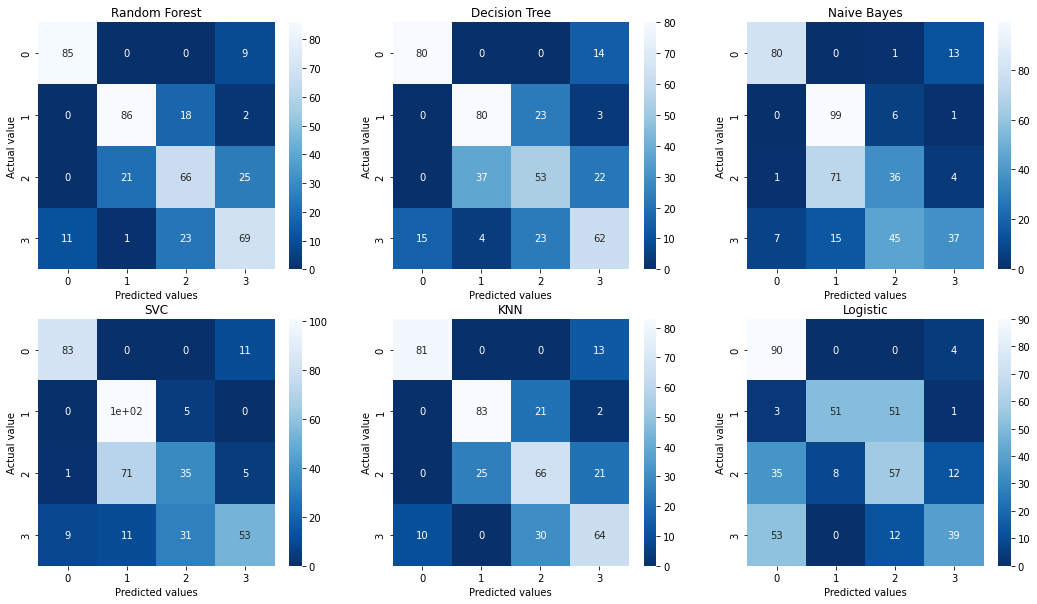

In [5]:
import seaborn as sns
fig = plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm,annot=True,cmap = 'Blues_r')
    cm_plot.set_xlabel('Predicted values')
    cm_plot.set_ylabel('Actual value')